##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [26]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



# Introduction

---

**The purpose of this project is to analyze voter registration by both state and month for 11 states, during 2 separate periods. My goal is to research whether there is analyze differences in voter registration from 2016 to 2020. I'd like this analysis to frame the quetion of if and how the COIVD Pandemic affected voter registration. This notebook is important to read for those who are interested in voter registration broken down by month, and broken down by state. Additionally, this notebook is particularly important when discussing the importance of being registered to vote and exercising your right to vote. I intend this notebook to be easy to navigate, and to provide information that will help researchers to study the effect of the 2020 pandemic on voter registration.**

# Research Questions

---

1. **On average, was voter registration higher in 2016 or 2020? How did the difference compare when looking at specific months?**
2. **With California being the state with the largest population, does it see the largest number of newly registered voters?**

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [3]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


**Conclusion**

---


- **Jurisdiction** describes the state from which the data was taken.
- **Year** tells the year from which the data was taken.
- **Month** tells the month from which the data was taken.
- **New registered voters** looks at the number of people that registered to vote in that state during that month and year.

Check for any missing data data. (1 point)

In [4]:
voters.isnull().values.any()

False

**Conlusion**

---


**Since this operation returned false, we know there are no null values in the dataframe, or in other words, no missing values.**

Check your data types. (1 point)

In [5]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


**Conclusion**

---


**In this dataframe, we have 2 datetypes: object and int64.**
- **object: Jurisdiction, Month**
- **int64: Year, New registered voters**

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [29]:
voters = voters.rename(columns={"Jurisdiction":"NAME"})
voters = voters.rename(columns={"New registered voters":"registered_voters"})

voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Explain any potential limitations to your data (2 points)

In [30]:
voters.value_counts("NAME")

,count
NAME,
District of Columbia,10
Maryland,10
North Carolina,10
Texas,10
Virginia,10
Arizona,8
California,8
Colorado,8
Delaware,8


**Conclusion**

---


**A large limitation of this data is that it only includes 12 states, so it will be hard to make a general assumption for a "national trend" when we're only looking at 12/50 states, which is just under 25% of national data. Aditionally, some states have 10 total months of data, and other states only have 8 total months of data, which may affect the accuracy of state averages when compared to one another.**

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [31]:
voters.loc[voters["registered_voters"].idxmax()]

,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


**Conclusion**

---


**The highest amount of new voter registration was seen in California in February of 2020. New voter registration reported was 238,281.**

What is the average voter registration? (1 points)

In [32]:
voters["registered_voters"].mean()

48223.46226415094

**Conclusion**

---


**The average voter registration in the dataframe rounds to 48,223.**

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [37]:
high_voters = voters.loc[voters["registered_voters"] > voters["registered_voters"].mean()]
high_voters = high_voters.reset_index()
high_voters.tail()

,index,NAME,Year,Month,registered_voters
31,89,Texas,2016,Apr,143199
32,90,Texas,2016,May,91205
33,91,Texas,2020,Jan,134559
34,92,Texas,2020,Feb,130080
35,93,Texas,2020,Mar,129424


**Conclusion**

---

**The dataframe high_voters shows each time that voter registration was higher than average. This happened a total of 36 times throughout the dataframe.**

How many times did each state go above the national average for new voter registration? (2 points)



In [11]:
high_voters.value_counts("NAME")

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


**Conclusion**

---


**States that recorded new voter registration over the national average:**
- **Texas went above national average voter registration 8 times.**
- **California, 7 times.**
- **Florida, 7 times.**
- **North Carolina, 6 times.**
- **Illinois, 4 times.**
- **Arizona, 3 times.**
- **Georgia, 1 time.**

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [38]:
average = voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False)
average.head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


**Conclusion**

---


**Highest overall voter registration ranks:**
1. **California with an average rounding to 144,545 newly registered voters.**
2. **Texas with an average rounding to 114,610 newly registered voters.**
3. **Florida with an average ronding to 65,868 newly registered voters.**

##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [13]:
voters2 = voters.groupby("NAME")["registered_voters"].sum().sort_values(ascending=False)
voters2 = voters2.reset_index()
voters2.head()

,NAME,registered_voters
0,California,1156363
1,Texas,1146101
2,North Carolina,560408
3,Florida,526945
4,Illinois,454723


In [14]:
colors = ["#FFB6C1", "#FF69B4", "#FFC0CB", "#E75480", "#FFD1DC", "#D8BFD8", "#C71585", "#FAE1DD", "#FF85A2", "#FADADD", "#FFF0F5"]

<ipython-input-15-f3fba8910095>:2: UserWarning: 
The palette list has fewer values (11) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(voters2, x="registered_voters", y= "NAME", hue="NAME", palette=colors)


Text(0.5, 1.0, 'Total of Newly Registered Voters in 2016 and 2020 by State')

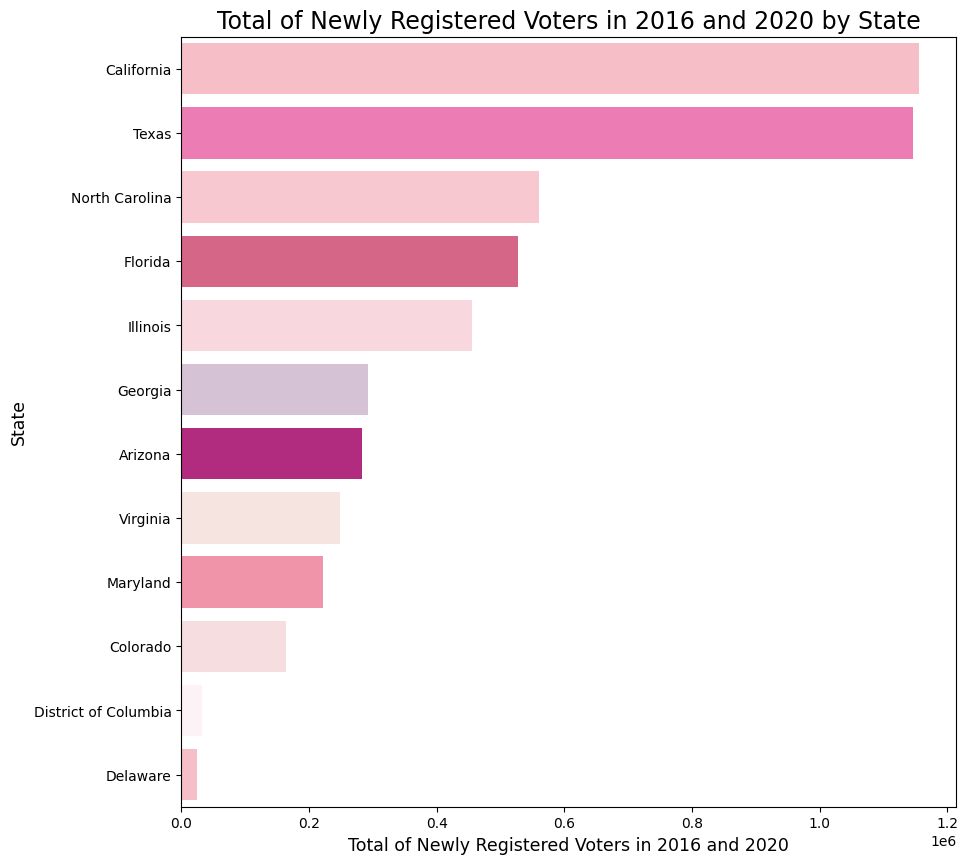

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(voters2, x="registered_voters", y= "NAME", hue="NAME", palette=colors)
plt.xlabel("Total of Newly Registered Voters in 2016 and 2020", fontsize=12.5)
plt.ylabel("State", fontsize=12.5)
plt.title("Total of Newly Registered Voters in 2016 and 2020 by State", fontsize=17)

**Conclusion**

---


**From this plot, the main thing to notice is California and Texas's number of newly registered voters, putting them in the lead of all 11 states that are represented. Additionally, it is noticable that the state with the smallest number of newly registered voters, Delaware, has a total of newly registered voters that is approximately 1 million less than the largest, California.**

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

<ipython-input-16-d911f13b0b72>:2: UserWarning: The palette list has more values (11) than needed (5), which may not be intended.
  sns.barplot(voters, x="Year", y="registered_voters", hue="Month", palette = colors)


Text(0.5, 1.0, 'New Registered Voters by Month in 2016 vs 2020')

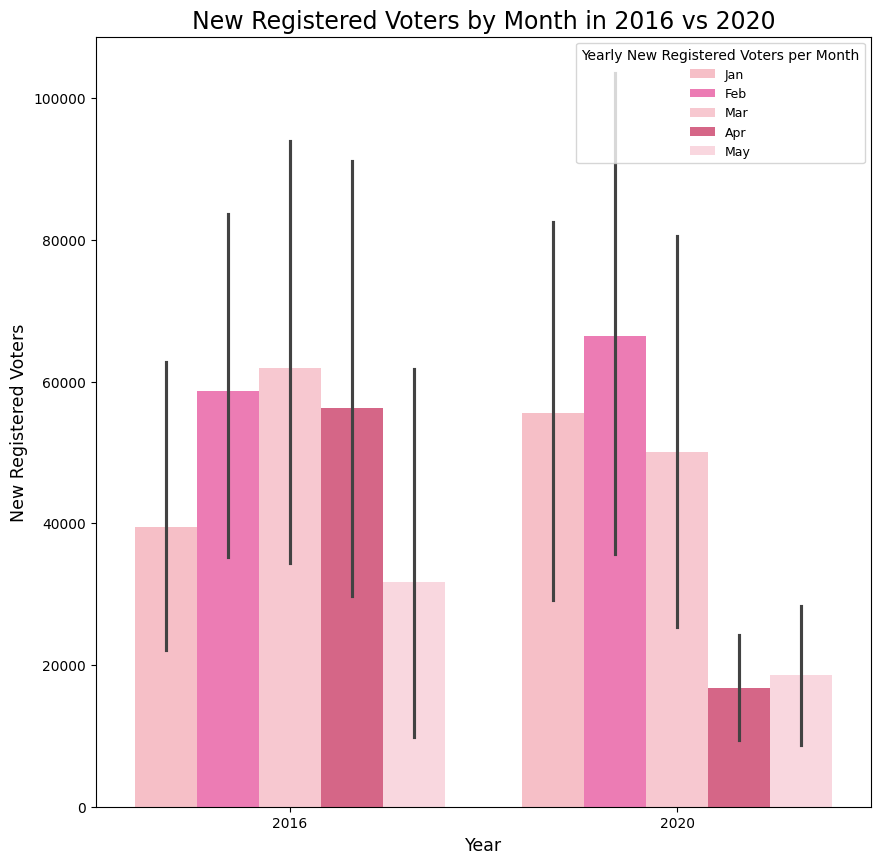

In [16]:
plt.figure(figsize = (10,10))
sns.barplot(voters, x="Year", y="registered_voters", hue="Month", palette = colors)
plt.legend(title="Yearly New Registered Voters per Month", fontsize = 9)
plt.xlabel("Year", fontsize = 12.5)
plt.ylabel("New Registered Voters", fontsize = 12.5)
plt.title("New Registered Voters by Month in 2016 vs 2020", fontsize = 17)

**Conclusion**

---

**This plot tells me that in both 2016 and 2020, The United States saw a spike in voter registration. In 2016, we see even greater registration in March, maintaining high through April. In 2020, we saw the opposite, a fairly sharp decrease in March, and an even sharper decrease in April. It appears that overall, new voter registration was lower in 2020, but it is hard to tell with the layout of this plot. Another important note about this graph is that May only has data recorded in 10 rows, where each other month has data recorded in 24 rows. For the purpose of this graph, looking at May is really only beneficial when comparing years. May can not accurately determine a "decrease" between months, because it has less data. If you wanted to dive in deeper with this plot, it may be beneficial to look at it without May.**

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

In [17]:
voters_year = voters.groupby("Year")["registered_voters"].sum()
voters_year = voters_year.reset_index()

Text(0.5, 1.0, 'Number of New Registered Voters by Year')

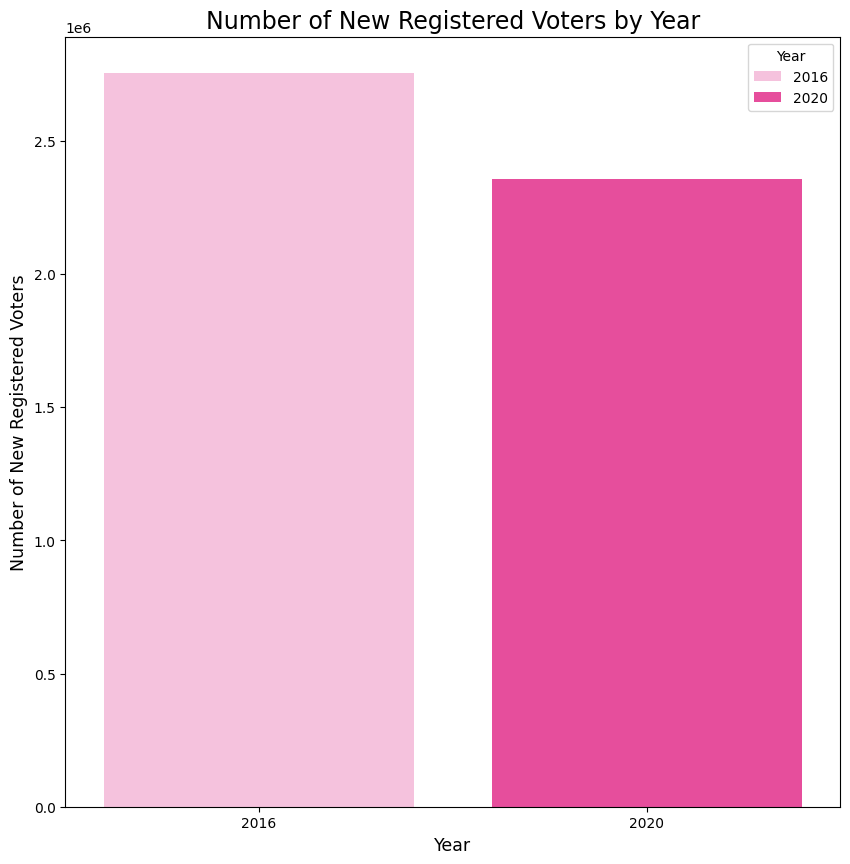

In [18]:
plt.figure(figsize = (10,10))
sns.barplot(voters_year, x="Year", y="registered_voters", palette = ["#fdbadd", "#ff359d"], hue = "Year")
plt.xlabel("Year", fontsize = 12.5)
plt.ylabel("Number of New Registered Voters", fontsize = 12.5)
plt.title("Number of New Registered Voters by Year", fontsize = 17)

**Conclusion:**

---


**In this plot, I am aiming to answer my first research question: On average, was voter registration higher in 2016 or in 2020? From this plot, it is clear that when taking an average of all represented state's new registered voters per year, 2016 saw significantly higher voter registration than 2020. This plot helps to answer questions regarding national trends that may have resulted from the previous graph, outlining specific Month's total new registrations per year, where some Months saw significantly lower new voter registration.**

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [19]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 4.33 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [20]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

In [21]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


Set our continental US bounding box to us for the next questions. (2 points)

In [22]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

Create a dataframe that shows the average voter registration per state. (2 points)

In [23]:
average_registration = voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False)
average_registration = average_registration.reset_index()

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [24]:
registration_map = bbox.merge(average_registration, on="NAME", how="inner")
registration_map

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

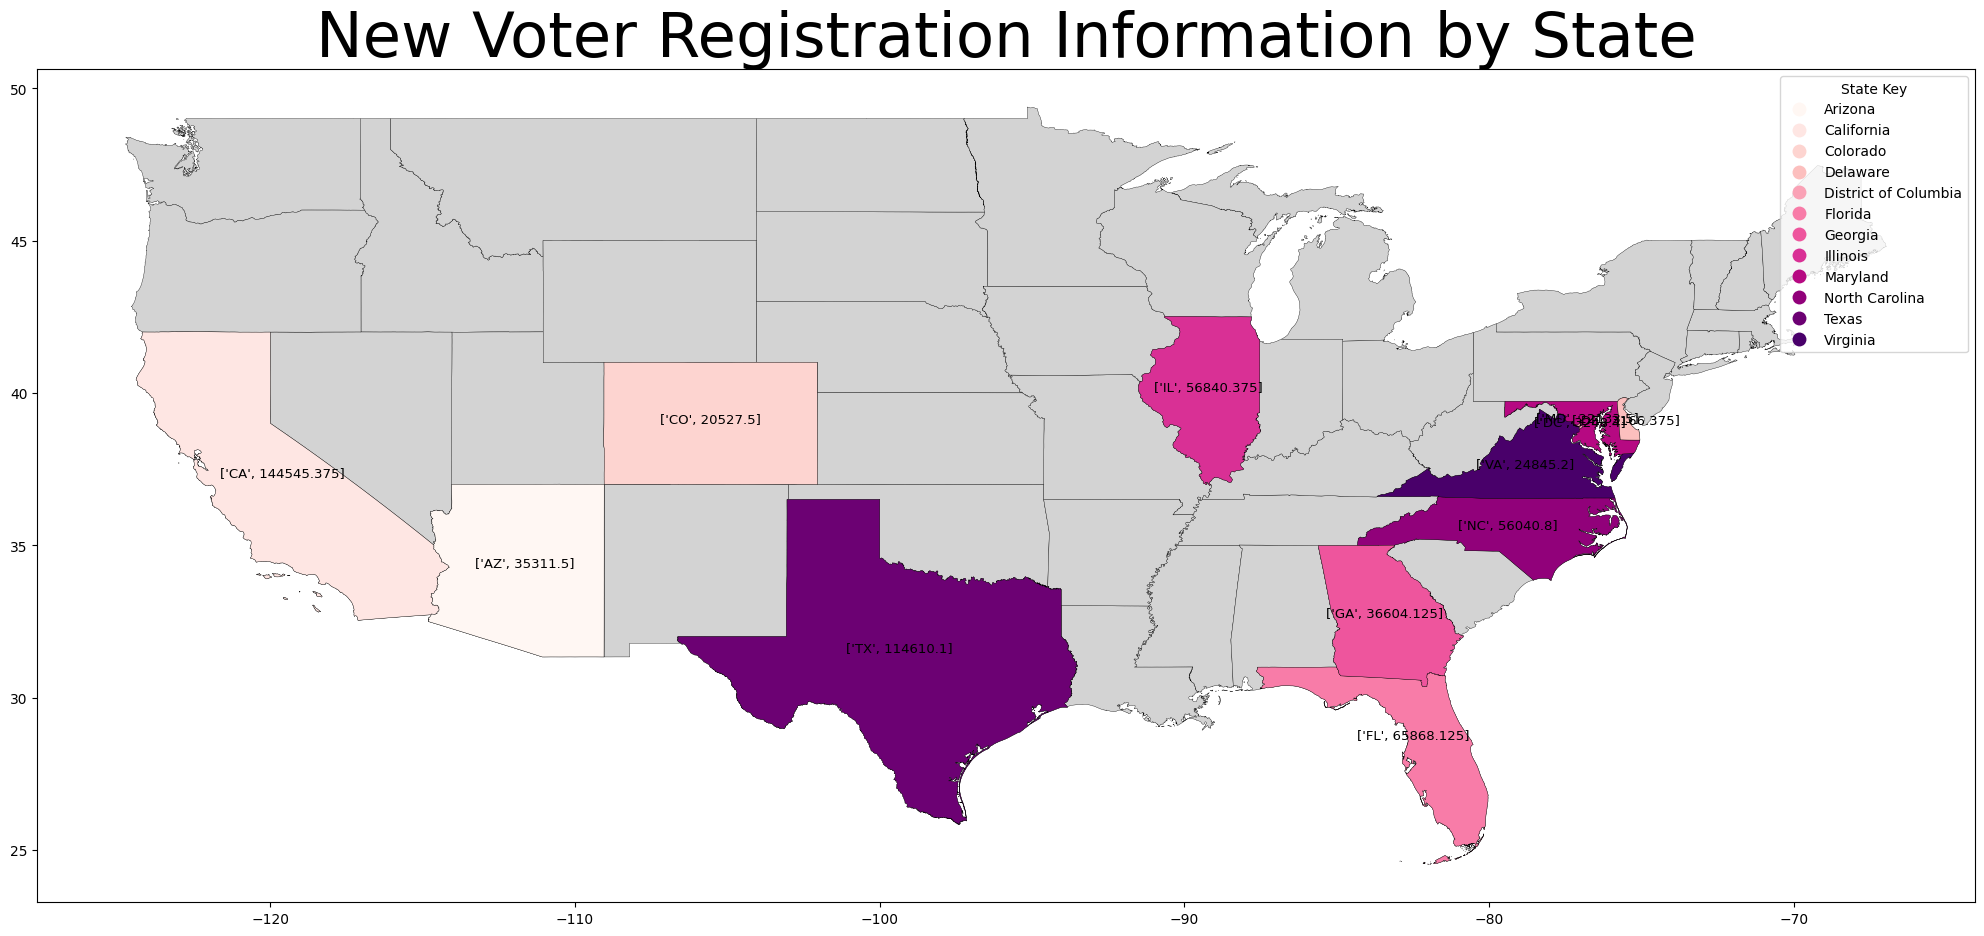

In [40]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot()
bbox.plot(ax = ax, color = "lightgray", edgecolor = "black", linewidth = 0.25 )

registration_map.plot(ax = ax, edgecolor = "black", linewidth = 0.25, cmap="RdPu", column = "NAME", legend = True, legend_kwds = {"title": "State Key"})

registration_map.apply(lambda x: ax.annotate(text=[x.STUSPS, x.registered_voters],
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=9.5),axis=1)

plt.title("New Voter Registration Information by State", fontsize = 45)

plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


# **Conclusion**

**INSIGHTS**

---

With this notebook I was able to analyze both national differences in new voter registration data, and state statistics in new voter registration. A large takeaway from my work is that nationally, on average, significantly less people registered to vote in 2020 than in 2016. Additionally, we see that California and Texas see the most voter registration, which make sense to me due to their high populations. Additionally, with that, we see that Delaware has the smallest new voter registration.

**Suggestions**

---

As far as suggestions go, I would reccomend the client to collect data for the months that are not represented in the data, and focus their marketing campaigns around the months that we see the lowest voter registration. Additionally, I would reccomend to keep efforts particularly high in February, as it seems that February is a big month for voter registration.

**Further Research**


---

In March of 2020 we see a significant decrease in number of new voters from 2016 to 2020. This decline leads me to question whether the Coronavirus Pandemic affected voter registration numbers, as the article explained the data suggests. For further research, I would continue to look at this trend, particularly focusing on election years (2024 and 2028) to determine whether COVID is to blame, or whether an external factor was present in 2020 that possibly will continue to carry through to following election periods. Additionally, as mentioned before, I would collect voter registration data in other months. With this data, we don't know when people registered. All this data tells us is how many people registered to vote through the months of Jauary to May. It's entirely possible that the reason for the "decrease" that we're observing in voting registration is due to delayed registration, rather than an overall decrease in registration. My best advice for furher research is to remain skeptical.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Paige Heggelke